In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sb

# Dataset Preparation

In [2]:
(x_train_full,y_train_full),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [3]:
x_train_full.shape,y_train_full.shape

((60000, 28, 28), (60000,))

In [4]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

5 :-label


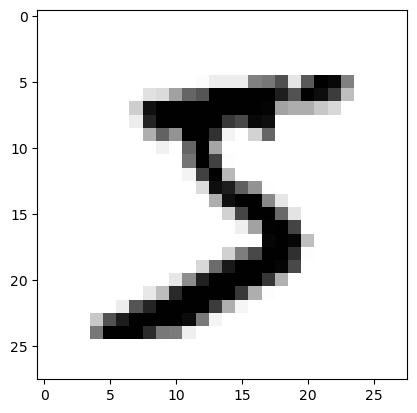

In [5]:
plt.imshow(x_train_full[0],cmap="binary")
print(y_train_full[0],":-label")

# Scale the x within 255

In [6]:
x_valid=x_train_full[0:5000]/255
y_valid=y_train_full[0:5000]

x_train=x_train_full[5000:]/255
y_train=y_train_full[5000:]


x_test=x_test/255

In [7]:
x_valid.shape,y_valid.shape,x_train.shape,y_train.shape

((5000, 28, 28), (5000,), (55000, 28, 28), (55000,))

In [8]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# Create architechture of NN

In [9]:
layers=[tf.keras.layers.Flatten(input_shape=(28, 28),name="Input_layer"),
tf.keras.layers.Dense(300,activation="relu",name="Hidden1"),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(0.2),       
tf.keras.layers.Dense(100,activation="relu",name="Hidden2"),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(10,activation="softmax",name="output")
       ]

C:\Users\shan\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model=tf.keras.models.Sequential(layers)

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden1 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden2 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 268,210 (1.02 MB)

 Trainable params: 267,410 (1.02 MB)

 Non-trainable params: 800 (3.12 KB)

# Compile the model

In [12]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

# Train the model

In [13]:
batch_size=64
epoch=21
validation=(x_valid,y_valid)
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epoch,validation_data=validation)

Epoch 1/21
860/860 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8638 - loss: 0.4454 - val_accuracy: 0.9682 - val_loss: 0.1065
Epoch 2/21
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9583 - loss: 0.1388 - val_accuracy: 0.9686 - val_loss: 0.1041
Epoch 3/21
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9672 - loss: 0.1076 - val_accuracy: 0.9734 - val_loss: 0.0855
Epoch 4/21
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9714 - loss: 0.0901 - val_accuracy: 0.9780 - val_loss: 0.0724
Epoch 5/21
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9762 - loss: 0.0751 - val_accuracy: 0.9784 - val_loss: 0.0679
Epoch 6/21
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9770 - loss: 0.0733 - val_accuracy: 0.9802 - val_loss: 0.0681
Epoch 7/21
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9808 - loss: 0.0583 - val_accuracy: 0.9788 - val_loss: 0.0716
Epoch 8/21
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9808 - loss: 0.0576 - val_accuracy: 0.

# Evaluate the model

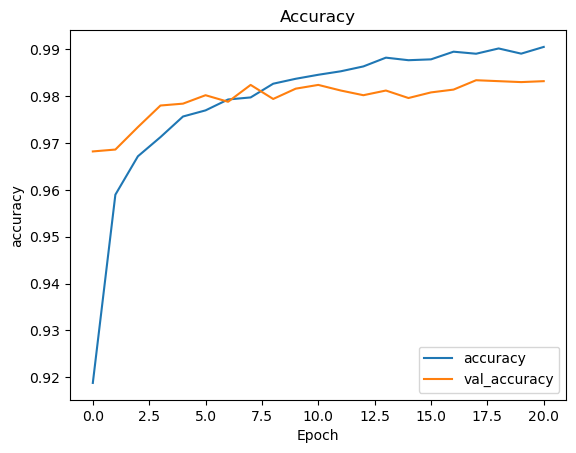

In [14]:
plt.plot(history.history['accuracy'],label="accuracy")
plt.plot(history.history['val_accuracy'],label="val_accuracy")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.legend(loc='lower right')

Text(0, 0.5, 'Loss')

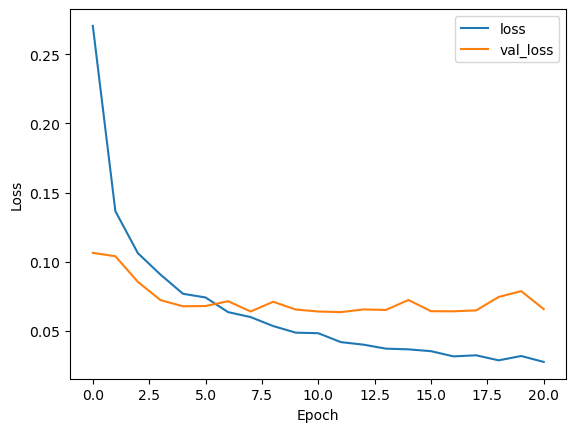

In [15]:
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [16]:
loss,accuracy=model.evaluate(x_test,y_test)
print("accuracy of the model is :",accuracy*100,"%")
print("loss of the model is :",loss*100,"%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9796 - loss: 0.0790
accuracy of the model is : 98.3299970626831 %
loss of the model is : 6.5331123769283295 %


# Predict 

In [17]:
y_actual=y_test[0:3]
x_new=x_test[0:3]


In [18]:
y_pred=model.predict(x_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


In [19]:
y_pred

array([[4.3934654e-07, 3.7238172e-07, 3.9062492e-08, 3.9484871e-07,
        1.6990818e-07, 1.5060419e-08, 7.1712152e-09, 9.9999833e-01,
        6.8725359e-10, 2.2993487e-07],
       [5.1991874e-06, 5.4561474e-06, 9.9998009e-01, 5.8929345e-06,
        5.4782223e-10, 1.4339073e-06, 1.9037370e-06, 2.7737351e-10,
        4.9462219e-08, 1.7568531e-10],
       [2.3135467e-09, 9.9999917e-01, 1.4613860e-07, 1.1207022e-08,
        1.3176610e-07, 1.5391863e-07, 1.1903736e-07, 6.0610361e-08,
        1.5634816e-07, 3.6184886e-10]], dtype=float32)

In [20]:
y_pred.round(3)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [21]:
y_pred=np.argmax(y_pred,axis=-1)
y_pred

array([7, 2, 1], dtype=int64)

In [22]:
y_actual

array([7, 2, 1], dtype=uint8)